# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.
    
    (optimize band)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Define percent bands (from 0 to 10% increment by 0.5)

In [4]:
bands = range(0, 100, 5)
bands = [str(band) for band in bands]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for band in bands:
    print("{0}".format(band), end=" ")
    strategies[band] = strategy.Strategy(symbol, capital, start, end, sma_period=200, percent_band=int(band)/10)
    strategies[band].run()
    _, strategies[band].tlog, strategies[band].dbal = strategies[band].get_logs()
    strategies[band].stats = strategies[band].get_stats()

0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'ending_balance',
           'max_closed_out_drawdown',
           'annualized_return_over_max_drawdown',
           'drawdown_recovery_period',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthlPyfolioy_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'trades_per_year',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
annual_return_rate,6.58,6.57,6.61,6.56,6.43,6.69,6.88,6.86,6.49,6.65,6.59,6.06,5.66,5.52,5.04,5.06,4.93,5.24,5.49,5.18
ending_balance,576002.13,572454.32,586937.94,569139.21,526555.22,615483.74,687762.87,681447.24,547039.52,599793.33,580515.31,421088.26,331194.07,305627.93,228786.48,230487.79,213395.10,257537.12,300385.51,240836.68
max_closed_out_drawdown,-28.23,-24.13,-22.18,-22.42,-21.53,-25.37,-25.07,-21.98,-23.71,-23.74,-23.68,-36.83,-37.04,-37.64,-37.62,-34.21,-34.24,-34.73,-34.99,-35.52
annualized_return_over_max_drawdown,0.23,0.27,0.30,0.29,0.30,0.26,0.27,0.31,0.27,0.28,0.28,0.16,0.15,0.15,0.13,0.15,0.14,0.15,0.16,0.15
drawdown_recovery_period,1460.00,250.00,178.00,280.00,861.00,867.00,1246.00,Not Recovered Yet,Not Recovered Yet,Not Recovered Yet,Not Recovered Yet,1626.00,1659.00,1881.00,1902.00,2206.00,2245.00,2282.00,2282.00,2287.00
best_month,13.38,14.89,14.90,14.91,14.88,14.91,14.93,14.94,14.48,14.45,14.46,14.47,14.54,14.44,14.55,14.49,14.49,14.49,14.45,14.53
worst_month,-17.36,-17.37,-18.80,-16.43,-16.41,-17.14,-13.82,-18.86,-18.84,-18.87,-18.82,-31.39,-31.36,-31.39,-31.39,-31.39,-31.43,-31.44,-31.45,-31.43
sharpe_ratio,0.67,0.67,0.67,0.67,0.65,0.68,0.69,0.68,0.65,0.66,0.65,0.59,0.55,0.54,0.50,0.50,0.49,0.51,0.53,0.50
sortino_ratio,0.75,0.75,0.75,0.75,0.74,0.76,0.78,0.75,0.72,0.74,0.73,0.62,0.59,0.57,0.52,0.53,0.52,0.55,0.58,0.55
monthly_std,2.89,2.92,2.93,2.92,2.93,2.93,2.91,2.96,2.95,2.99,3.01,3.16,3.18,3.19,3.22,3.20,3.22,3.26,3.29,3.33


Bar graphs

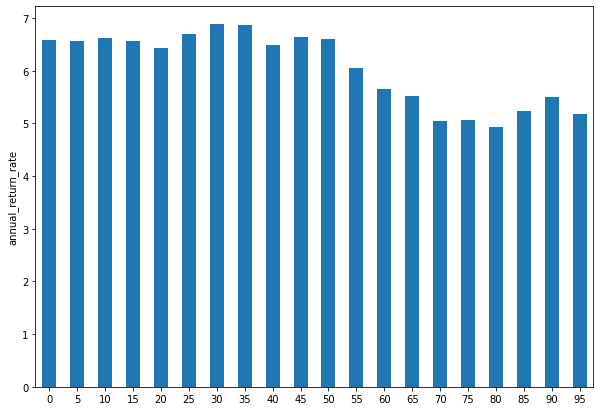

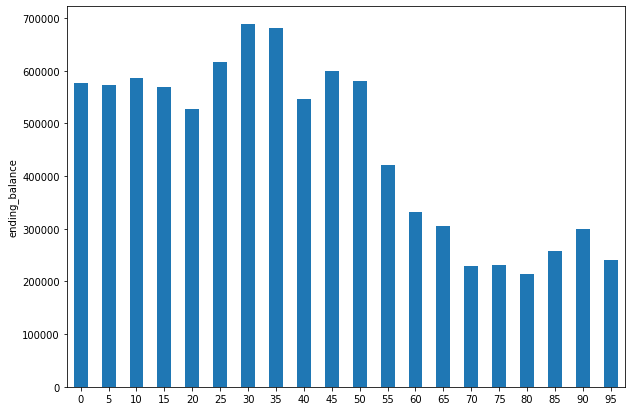

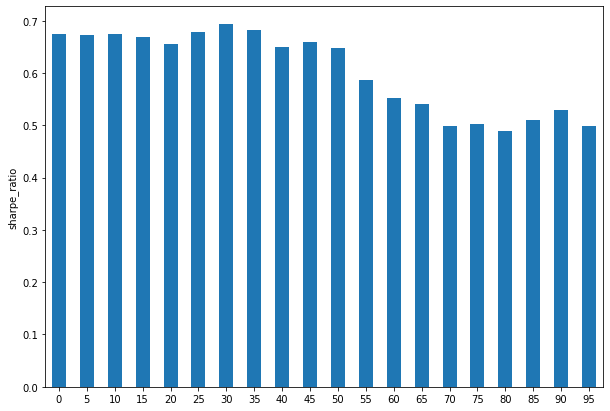

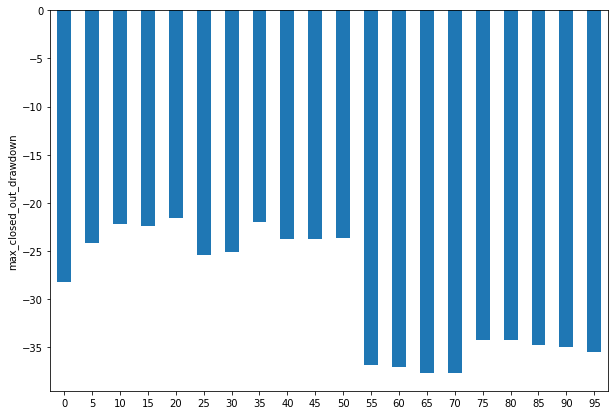

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'ending_balance')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[bands[0]]
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()

Equity curve

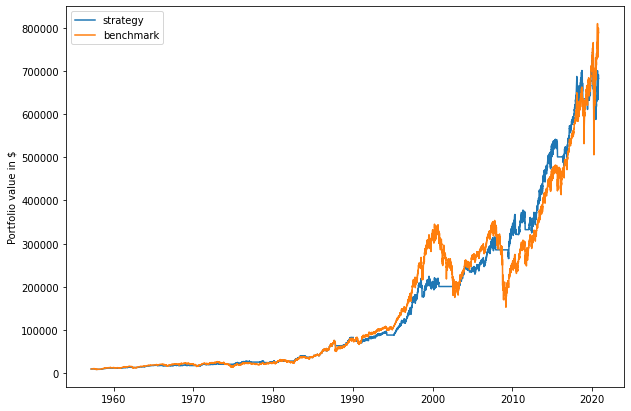

In [9]:
pf.plot_equity_curve(strategies['35'].dbal, benchmark=benchmark.dbal)